In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import preprocessing as pre 
from mpl_toolkits.mplot3d import Axes3D

data_type = {"CustomerID": str}
df = pd.read_excel('Online Retail.xlsx', dtype = data_type)


In [4]:
#Data preprocessing

selected_variables = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country']

df_selected = df[selected_variables]

# Create aggregated variable (Amount)
df_selected['Total_Amount_Spent'] = df_selected['Quantity'] * df_selected['UnitPrice']

# Separate InvoiceDate into Date and Time
df_selected['Date'] = df_selected['InvoiceDate'].dt.date
df_selected['Time'] = df_selected['InvoiceDate'].dt.time

# Filter out rows without values in all variables 
df_selected = df_selected.dropna()
df_selected.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount_Spent,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00


In [5]:
# #compare RFM variables to 2012-01-01 
# today_date = pd.to_datetime("2012-01-01")

# print(df_selected.dtypes)

# # Group by CustomerID and aggregate Recency, Frequency, Monetary, and Mean_Price
# rfm_dataset = df_selected.groupby('CustomerID').agg({
#     'InvoiceDate': lambda x: (today_date - x.max()).days,  # Calculate Recency
#     'Quantity': 'count',  # Calculate Frequency
#     'Total_Amount_Spent': 'sum',  # Calculate Monetary

# })



# # Display the result
# rfm_dataset.head()

rfm_dataset = pre.preprocess_and_aggregate_with_recency(df_selected)

# Rename the columns for clarity
rfm_dataset.rename(columns={
    "RecencyDays": "Recency",
    "UniqueInvoices": "Frequency",
    "TotalRevenue": "Monetary",
    }, inplace=True
)

# Filter rows with Monetary variable value not equal to 0
rfm_dataset = rfm_dataset[rfm_dataset['Monetary'] != 0]


rfm_dataset.head()

,CustomerID,TotalQuantity,Monetary,Frequency,Recency
1,12347,2458,4310.00,7,1
2,12348,2341,1797.24,4,74
3,12349,631,1757.55,1,18
4,12350,197,334.40,1,309
5,12352,470,1545.41,11,35


           Country  Total_Amount_Spent
35  United Kingdom         6767873.394
23     Netherlands          284661.540
10            EIRE          250285.220
14         Germany          221698.210
13          France          196712.840


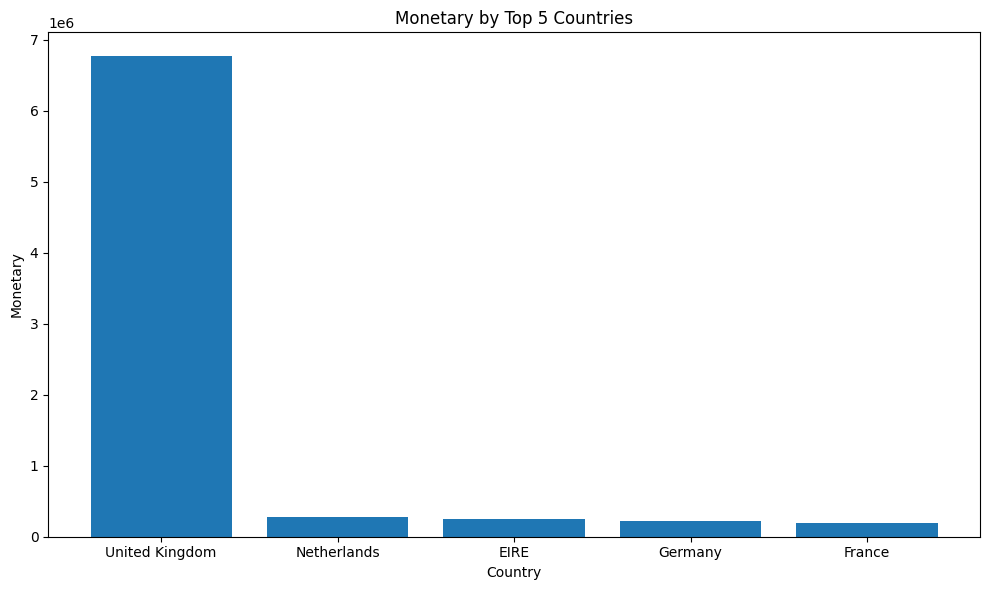

In [6]:
Monetary_Country = df_selected[['Country', 'Total_Amount_Spent']]

Monetary_Country= Monetary_Country.groupby('Country')['Total_Amount_Spent'].sum().reset_index()

Monetary_Country = Monetary_Country.sort_values(by='Total_Amount_Spent', ascending=False)

Monetary_Country = Monetary_Country.head(5)

print(Monetary_Country)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(Monetary_Country['Country'], Monetary_Country['Total_Amount_Spent'])
plt.xlabel('Country')
plt.ylabel('Monetary')
plt.title('Monetary by Top 5 Countries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


                             Description  Quantity
3805   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
1771             JUMBO BAG RED RETROSPOT     45066
217        ASSORTED COLOUR BIRD ORNAMENT     35314
3716  WHITE HANGING HEART T-LIGHT HOLDER     34147
2279     PACK OF 72 RETROSPOT CAKE CASES     33409
2612                      POPCORN HOLDER     30504
2669                  RABBIT NIGHT LIGHT     27094
2057             MINI PAINT SET VINTAGE      25880
2245          PACK OF 12 LONDON TISSUES      25321
2277  PACK OF 60 PINK PAISLEY CAKE CASES     24163


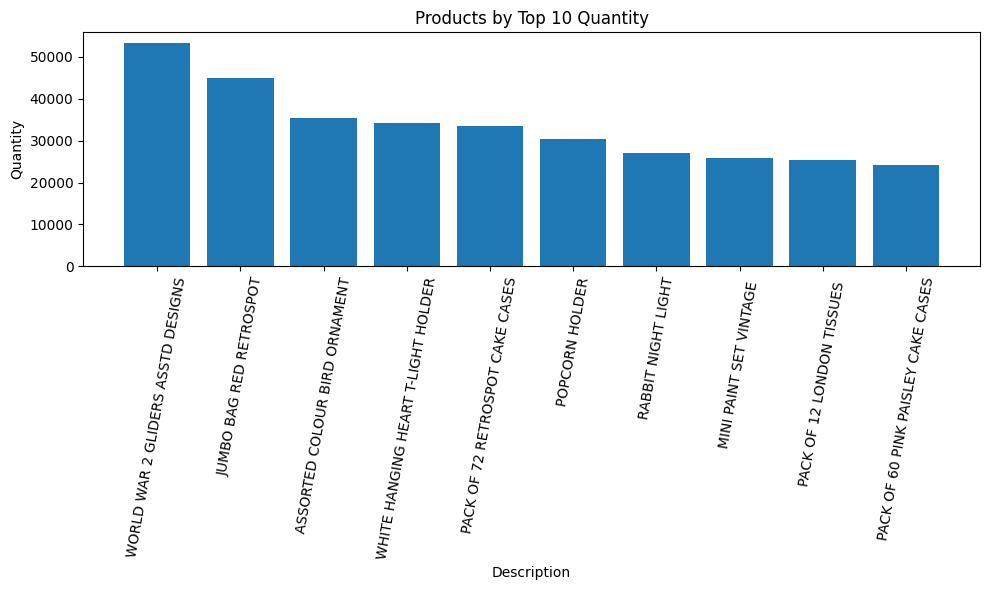

In [7]:
#most popular product 
Quantity_Product = df_selected[["Description", 'Quantity']]

Quantity_Product = Quantity_Product.groupby('Description')['Quantity'].sum().reset_index()

Quantity_Product = Quantity_Product.sort_values(by='Quantity', ascending=False)

Quantity_Product = Quantity_Product.head(10)

print(Quantity_Product)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(Quantity_Product['Description'], Quantity_Product['Quantity'])
plt.xlabel('Description')
plt.ylabel('Quantity')
plt.title('Products by Top 10 Quantity')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()



                             Description  Total_Amount_Spent  Quantity
2780            REGENCY CAKESTAND 3 TIER           132870.40     11555
3716  WHITE HANGING HEART T-LIGHT HOLDER            93823.85     34147
1771             JUMBO BAG RED RETROSPOT            83236.76     45066
2355                       PARTY BUNTING            67687.53     15027
2624                             POSTAGE            66710.24      3002
217        ASSORTED COLOUR BIRD ORNAMENT            56499.22     35314
2669                  RABBIT NIGHT LIGHT            51137.80     27094
725                        CHILLI LIGHTS            45936.81      9570
2323     PAPER CHAIN KIT 50'S CHRISTMAS             41500.48     15164
2405      PICNIC BASKET WICKER 60 PIECES            39619.50        61


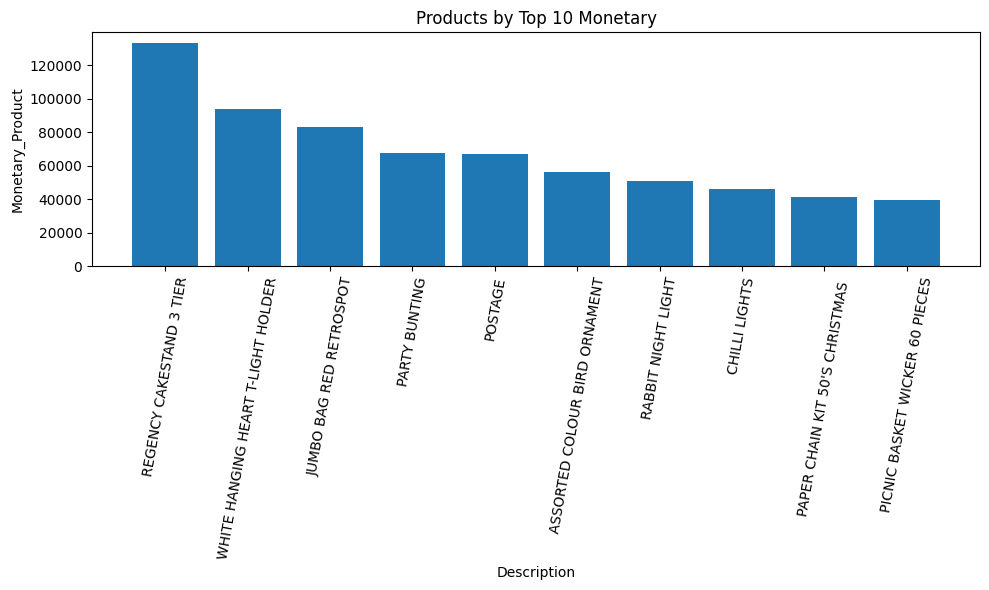

In [8]:
# Select relevant columns
Monetary_Product = df_selected[["Description", "Quantity","UnitPrice", "Total_Amount_Spent"]]

Monetary_Product = df_selected.groupby('Description').agg({
    'Total_Amount_Spent': 'sum',
    'Quantity': 'sum',  # Optional: Also sum the quantity for reference
}).reset_index()

# Sort by Total_Amount_Spent in descending order
Monetary_Product = Monetary_Product.sort_values(by='Total_Amount_Spent', ascending=False)

# Select the top 10 most profitable products
Monetary_Product = Monetary_Product.head(10)


# Print the top 10 most profitable products
print(Monetary_Product)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(Monetary_Product['Description'], Monetary_Product['Total_Amount_Spent'])
plt.xlabel('Description')
plt.ylabel('Monetary_Product')
plt.title('Products by Top 10 Monetary')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()



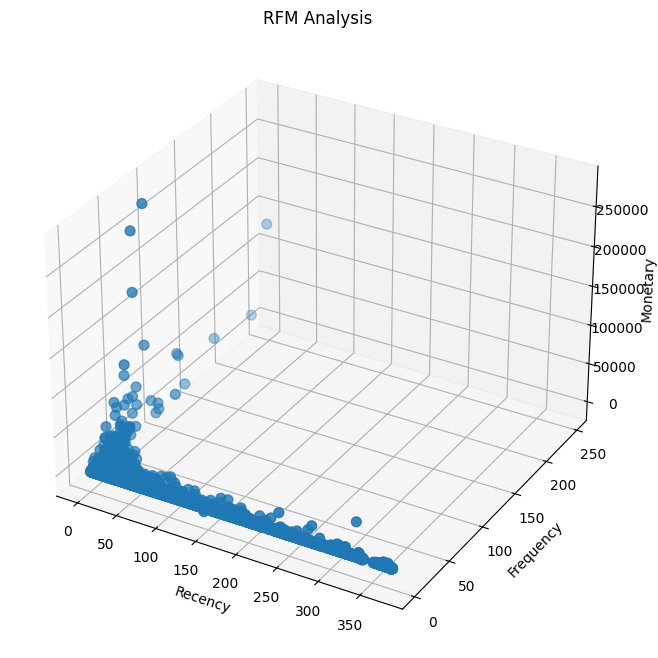

In [9]:

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(rfm_dataset['Recency'], rfm_dataset['Frequency'], rfm_dataset['Monetary'], s=50)

# Set labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('RFM Analysis')

# Show plot
plt.show()




In [10]:
# Define functions to categorize customers based on each variable and assign scores
def categorize_recency(recency):
    if recency <= 73:
        return 1
    elif recency <= 146:
        return 2
    elif recency <= 219:
        return 3
    elif recency <= 292:
        return 4
    else:
        return 5

def categorize_frequency(frequency):
    if frequency <= rfm_dataset['Frequency'].quantile(0.2):
        return 1
    elif frequency <= rfm_dataset['Frequency'].quantile(0.4):
        return 2
    elif frequency <= rfm_dataset['Frequency'].quantile(0.6):
        return 3
    elif frequency <= rfm_dataset['Frequency'].quantile(0.8):
        return 4
    else:
        return 5

def categorize_monetary(monetary):
    if monetary <= rfm_dataset['Monetary'].quantile(0.2):
        return 1
    elif monetary <= rfm_dataset['Monetary'].quantile(0.4):
        return 2
    elif monetary <= rfm_dataset['Monetary'].quantile(0.6):
        return 3
    elif monetary <= rfm_dataset['Monetary'].quantile(0.8):
        return 4
    else:
        return 5

# Apply categorization functions to each variable and assign scores
rfm_dataset['Recency_Score'] = rfm_dataset['Recency'].apply(categorize_recency)
rfm_dataset['Frequency_Score'] = rfm_dataset['Frequency'].apply(categorize_frequency)
rfm_dataset['Monetary_Score'] = rfm_dataset['Monetary'].apply(categorize_monetary)

# Add up the scores for each customer
rfm_dataset['Total_Score'] = rfm_dataset['Recency_Score'] + rfm_dataset['Frequency_Score'] + rfm_dataset['Monetary_Score']

# Print the result
print(rfm_dataset.head())


  CustomerID  TotalQuantity  Monetary  Frequency  Recency  Recency_Score  \
1      12347           2458   4310.00          7        1              1   
2      12348           2341   1797.24          4       74              2   
3      12349            631   1757.55          1       18              1   
4      12350            197    334.40          1      309              5   
5      12352            470   1545.41         11       35              1   

   Frequency_Score  Monetary_Score  Total_Score  
1                4               5           10  
2                3               4            9  
3                1               4            6  
4                1               2            8  
5                5               4           10  


In [11]:
# Filter customers with high scores on two different variables but low on one variable
Two_high_score_low_variable_customers = rfm_dataset[((rfm_dataset['Recency_Score'] >= 3) & (rfm_dataset['Frequency_Score'] >= 3) & (rfm_dataset['Monetary_Score'] <= 2)) |
                                                ((rfm_dataset['Recency_Score'] >= 3) & (rfm_dataset['Monetary_Score'] >= 3) & (rfm_dataset['Frequency_Score'] <= 2)) |
                                                ((rfm_dataset['Frequency_Score'] >= 3) & (rfm_dataset['Monetary_Score'] >= 3) & (rfm_dataset['Recency_Score'] <= 2))]

# Print the result
print(Two_high_score_low_variable_customers)

# Count the number of customers included
num_customers = Two_high_score_low_variable_customers.shape[0]

# Print the result
print("Number of customers included:", num_customers)






     CustomerID  TotalQuantity  Monetary  Frequency  Recency  Recency_Score  \
1         12347           2458   4310.00          7        1              1   
2         12348           2341   1797.24          4       74              2   
5         12352            470   1545.41         11       35              1   
7         12354            530   1079.40          1      231              4   
9         12356           1591   2811.43          3       22              1   
...         ...            ...       ...        ...      ...            ...   
4352      18259            714   2338.60          3       24              1   
4356      18263           1467   1211.08          4       22              1   
4361      18272           2044   3064.78          7        2              1   
4370      18283           1397   2094.88         16        3              1   
4371      18287           1586   1837.28          3       42              1   

      Frequency_Score  Monetary_Score  Total_Score 

In [12]:
#indie buyers -- priorities low -- relation with these customers 

# Filter customers with low recency score and high frequency score
low_recency_low_frequency_customers = rfm_dataset[(rfm_dataset['Recency_Score'] <= 2) & (rfm_dataset['Frequency_Score'] <= 2)]

# Print the result
print(low_recency_low_frequency_customers)

print(low_recency_low_frequency_customers.columns)


# Get the CustomerIDs of customers with low recency and high frequency
customer_ids = low_recency_low_frequency_customers['CustomerID']

#maybe we can try to increase their will to buy by giving them coupons

     CustomerID  TotalQuantity      Monetary  Frequency  Recency  \
3         12349            631  1.757550e+03          1       18   
10        12357           2708  6.207670e+03          1       32   
11        12358            248  1.168060e+03          2        1   
16        12363            408  5.520000e+02          2      109   
19        12367            173  1.689000e+02          1        3   
...         ...            ...           ...        ...      ...   
4355      18262            182  1.494800e+02          1      139   
4357      18265            311  8.015100e+02          2       71   
4363      18274              0  1.776357e-15          2       17   
4365      18277             67  9.763000e+01          2       57   
4366      18278             66  1.739000e+02          1       73   

      Recency_Score  Frequency_Score  Monetary_Score  Total_Score  
3                 1                1               4            6  
10                1                1           

In [13]:
#organizational buyers -- maintain relation with these customers, prorities high

# Filter customers with low recency score and high frequency score
low_recency_high_frequency_customers = rfm_dataset[(rfm_dataset['Recency_Score'] >= 3) & (rfm_dataset['Frequency_Score'] >= 3)]

# Print the result
print(low_recency_high_frequency_customers)

print(low_recency_high_frequency_customers.columns)


# Get the CustomerIDs of customers with low recency and high frequency
customer_ids = low_recency_high_frequency_customers['CustomerID']

# Filter the purchase history DataFrame to include only the items bought by these customers
customer_purchase_history = df_selected[df_selected['CustomerID'].isin(customer_ids)]

# Print the result
print(customer_purchase_history[['CustomerID', 'Description']])




     CustomerID  TotalQuantity  Monetary  Frequency  Recency  Recency_Score  \
18        12365            173    320.69          3      290              4   
31        12383           1529   1839.31          6      184              3   
51        12410            209    681.08          3      300              5   
54        12414            300    562.41          3      216              3   
118       12493            206    416.79          3      165              3   
...         ...            ...       ...        ...      ...            ...   
4307      18202            581   1396.99          3      199              3   
4319      18218            546    626.38          4      205              3   
4332      18231            808   2066.17          6      191              3   
4338      18239            795   1561.61          5      218              3   
4353      18260           1469   2595.00          8      172              3   

      Frequency_Score  Monetary_Score  Total_Score 

In [18]:
# Define the list of holidays (customize as needed)
holidays = [
    '2010-01-01', '2010-04-02', '2010-04-05', '2010-05-03', '2010-05-31', '2010-08-30', '2010-12-25', '2010-12-26',
    '2011-01-01', '2011-04-22', '2011-04-25', '2011-05-02', '2011-05-30', '2011-08-29', '2011-12-25', '2011-12-26'
]
holidays = pd.to_datetime(holidays)

# Define the pre-holiday period (e.g., 7 days before each holiday)
pre_holiday_period = 7

# Function to flag pre-holiday periods
def flag_pre_holidays(df, date_col='InvoiceDate', holidays=holidays, pre_holiday_period=pre_holiday_period):
    df['Pre_Holiday'] = df[date_col].apply(
        lambda x: any((x.date() >= (holiday - pd.Timedelta(days=pre_holiday_period)).date()) & (x.date() < holiday.date()) for holiday in holidays)
    )
    return df

# Assuming df_selected is your DataFrame with 'InvoiceDate' column
df_selected = flag_pre_holidays(df_selected)

# Display the updated DataFrame with Pre_Holiday flag
print(df_selected[['InvoiceDate', 'Pre_Holiday']].head())

# Calculate total sales during pre-holidays and non-pre-holidays
pre_holiday_sales = df_selected[df_selected['Pre_Holiday']].groupby('Pre_Holiday').agg({
    'Total_Amount_Spent': 'sum',
    'InvoiceNo': 'count'  # Number of transactions
}).rename(columns={'Total_Amount_Spent': 'Pre_Holiday_Sales', 'InvoiceNo': 'Pre_Holiday_Transactions'})

non_pre_holiday_sales = df_selected[~df_selected['Pre_Holiday']].agg({
    'Total_Amount_Spent': 'sum',
    'InvoiceNo': 'count'  # Number of transactions
}).rename({'Total_Amount_Spent': 'Non_Pre_Holiday_Sales', 'InvoiceNo': 'Non_Pre_Holiday_Transactions'})

# Combine the results into a summary DataFrame
summary_pre_holiday = pd.DataFrame({
    'Pre_Holiday_Sales': pre_holiday_sales['Pre_Holiday_Sales'],
    'Non_Pre_Holiday_Sales': non_pre_holiday_sales['Non_Pre_Holiday_Sales'],
    'Pre_Holiday_Transactions': pre_holiday_sales['Pre_Holiday_Transactions'],
    'Non_Pre_Holiday_Transactions': non_pre_holiday_sales['Non_Pre_Holiday_Transactions']
}).T

# Display the summary
summary_pre_holiday.head()
non_pre_holiday_sales.head()

# Plot sales comparison
plt.figure(figsize=(10, 6))
summary_pre_holiday[['Pre_Holiday_Sales', 'Non_Pre_Holiday_Sales']].plot(kind='bar')
plt.title('Sales Comparison: Pre-Holidays vs Non-Pre-Holidays')
plt.xlabel('Sales Type')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=0)
plt.show()

# # Plot transaction comparison
# plt.figure(figsize=(10, 6))
# summary_pre_holiday[['Pre_Holiday_Transactions', 'Non_Pre_Holiday_Transactions']].plot(kind='bar')
# plt.title('Transaction Comparison: Pre-Holidays vs Non-Pre-Holidays')
# plt.xlabel('Transaction Type')
# plt.ylabel('Number of Transactions')
# plt.xticks(rotation=0)
# plt.show()



          InvoiceDate  Pre_Holiday
0 2010-12-01 08:26:00        False
1 2010-12-01 08:26:00        False
2 2010-12-01 08:26:00        False
3 2010-12-01 08:26:00        False
4 2010-12-01 08:26:00        False


Non_Pre_Holiday_Sales           7769270.853
Non_Pre_Holiday_Transactions     380452.000
dtype: float64